In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [13]:
name_to_sims = {}
for name in ['cc_8k', 'cc_merged_v2_8k']:  # 'cc_merged_v1_8k'
    # filename = f"{name}_jaccard_sims.npy"
    filename = f"{name}_bigram_overlap.npy"
    # filename = f"{name}_trigram_jaccard_similarity.npy"
    print(filename)
    base_path = '/home/aiops/zhuty/tinyllama/processing/corpus_analysis'
    name_to_sims[name] = np.load(os.path.join(base_path, filename))
    print("Length of sims:", len(name_to_sims[name]))

cc_8k_bigram_overlap.npy
Length of sims: 831764
cc_merged_v2_8k_bigram_overlap.npy
Length of sims: 831981


Length of sims: 831764
Length of sims: 831981


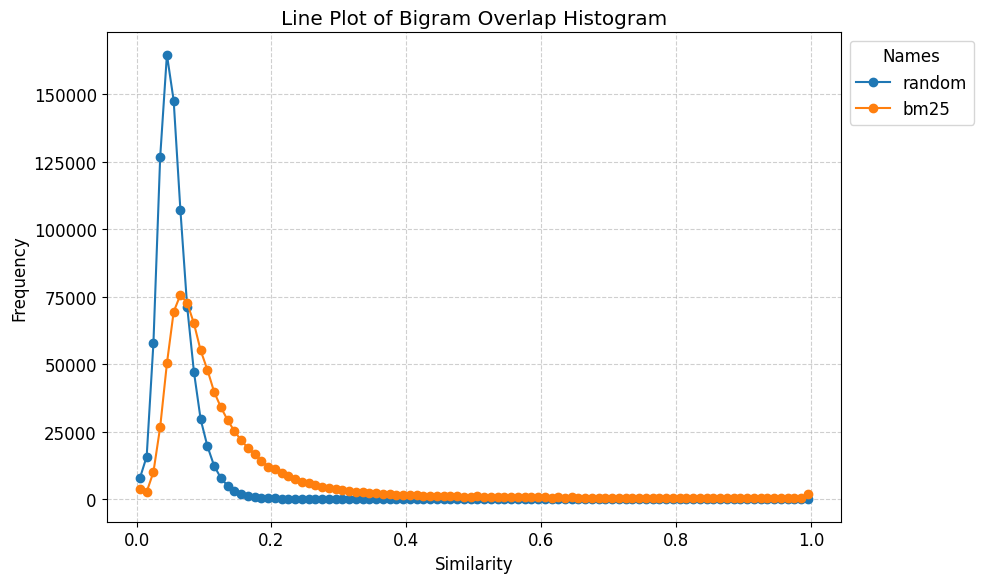

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Set a larger figure size for better readability
plt.figure(figsize=(10, 6))

# Define common bins for all histograms based on the range you expect your data to cover
# For instance, if your similarity scores range from 0 to 1, you can specify that range explicitly.
min_sim = 0
max_sim = 1
bins = np.linspace(min_sim, max_sim, 101)  # 100 bins between 0 and 1
name_to_real = {'cc_8k': "random", 'cc_merged_v2_8k': "bm25", 'cc_merged_v1_8k': "dense"}
for name, sims in name_to_sims.items():
    # Optional: Assert to ensure data meets expectations (commented for cleaner code)
    # assert len(sims) == 100000, f"Length of sims should be 100000, but got {len(sims)}, name {name}"
    print("Length of sims:", len(sims))

    # Compute histogram data using the predefined bins
    counts, bin_edges = np.histogram(sims, bins=bins)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Calculate bin centers

    # Plotting the histogram as a line plot
    plt.plot(bin_centers, counts, label=name_to_real[name], linestyle='-', marker='o')

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Adding titles and labels
plt.title('Line Plot of Bigram Overlap Histogram')
plt.xlabel('Similarity')
plt.ylabel('Frequency')

# Increasing font sizes for better visibility
plt.rcParams.update({'font.size': 12})

# Adjusting the legend to display outside the plot area
plt.legend(title="Names", loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()  # Adjust layout to not cut off legend
plt.show()


In [15]:
# get the percentile of a list of values
def get_percentile(values, percentile):
    return np.percentile(values, percentile)

In [48]:
get_percentile(name_to_sims['cc_merged_v1_8k'], 90)

0.12470023980815348

In [54]:
get_percentile(name_to_sims['cc_merged_v2_8k'], 50)

0.0967741935483871

In [19]:
get_percentile(name_to_sims['cc_merged_v2_8k'], 96)

0.5010597832160012